In [87]:
%load_ext autoreload
%autoreload 2

import sys, os, multiprocessing
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '..')))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hydra.model import plot
import hydra.model.helper as helper
from hydra.model.shell import Shell
from hydra.model.layer import Layer
from hydra.model.smc import SMC
import cmocean

DT = 0.02
TIME_SEQ = [0.02, 0.09, 16, 20, 30, 40]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
FILENAME = "2020-07-21-04-04-16-552027"
METAPATH = "./results/data/meta.txt"

In [53]:
# Read the simulation results
calcium = pd.read_hdf("./results/data/calcium/" + FILENAME + ".h5")
calcium = calcium.values.reshape(len(calcium), 100, 100)
calcium.shape

(15000, 100, 100)

In [46]:
# Separate ectoderm and endoderm
calcium_ecto = calcium[5000:, :50, :]
calcium_endo = calcium[5000:, 50:, :]

In [47]:
# Get the connectivity map
SPARSITY = 0.002
layer = Layer(SMC(T=300, dt=0.0002), gip3x=0.05, gip3y=3, numx=50, numy=100)
shell = Shell(layer, layer, sparsity=SPARSITY)
pattern1 = shell.cross_layer_pattern.reshape(50, 100)

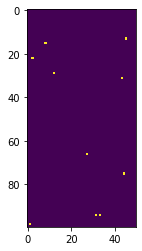

In [48]:
plt.figure()
plt.imshow(np.flip(pattern1.T, 0))
plt.show()

In [94]:
def plot_conn_ratios(filename, label, savepath, sparsity):
    
    # Read the simulation results
    calcium = pd.read_hdf("./results/data/calcium/" + filename + ".h5")
    calcium = calcium.values.reshape(len(calcium), 60, 60)
    calcium.shape
    
    # Separate ectoderm and endoderm
    calcium_ecto = calcium[:, :30, :]
    calcium_endo = calcium[:, 30:, :]
    
    # Get the connectivity map
    layer = Layer(SMC(T=300, dt=0.0002), gip3x=0.05, gip3y=3, numx=30, numy=60)
    shell = Shell(layer, layer, sparsity=sparsity, seed=1112)
    pattern1 = shell.cross_layer_pattern.reshape(30, 60)
    
    fig = plt.figure(figsize=(13,5))
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(np.flip(pattern1.T, 0))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title('conn. ratio=' + str(sparsity))
    ax.text(-0.1, 1.05, label, size=30, weight="bold", transform=ax.transAxes)

    for j, moment in enumerate(TIME_SEQ):
        ax = fig.add_subplot(2, 2+len(TIME_SEQ), j+1+2)
        im = ax.imshow(np.flip(calcium_ecto[int(moment / DT)].T, 0), cmap='hot', vmin=0, vmax=1)
        ax.text(1, 8, str(moment) + 's', color='white', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.patch.set_edgecolor('g')  
        ax.patch.set_alpha(1)
        ax.patch.set_linewidth('10')  

        ax = fig.add_subplot(2, 2+len(TIME_SEQ), j+1+len(TIME_SEQ)+2+2)
        ax.imshow(np.flip(calcium_endo[int(moment / DT)].T, 0), cmap='hot', vmin=0, vmax=1)
        ax.text(1, 8, str(moment) + 's', color='white', fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.patch.set_edgecolor('r')
        ax.patch.set_alpha(1)  
        ax.patch.set_linewidth('10')  
    
    cax = fig.add_axes([0.92, 0.12, 0.01, 0.76])
    cb = plt.colorbar(im, cax=cax)
    cb.set_label('[Ca$^{2+}$]($\mu$M)')
    plt.subplots_adjust(hspace=0.1)
    plt.savefig(savepath, bbox_inches='tight')
    plt.show()

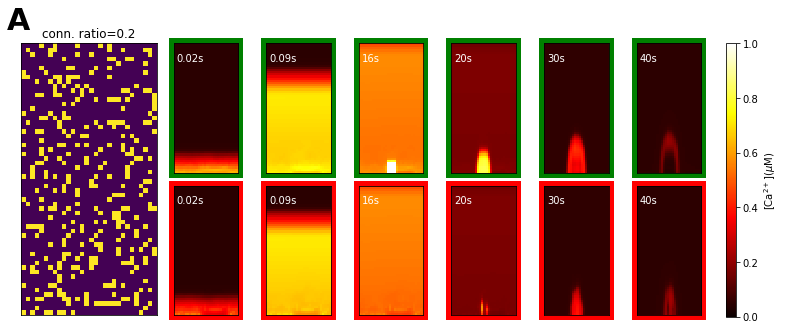

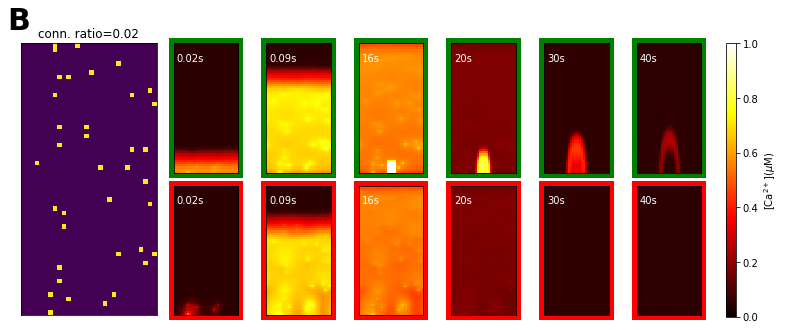

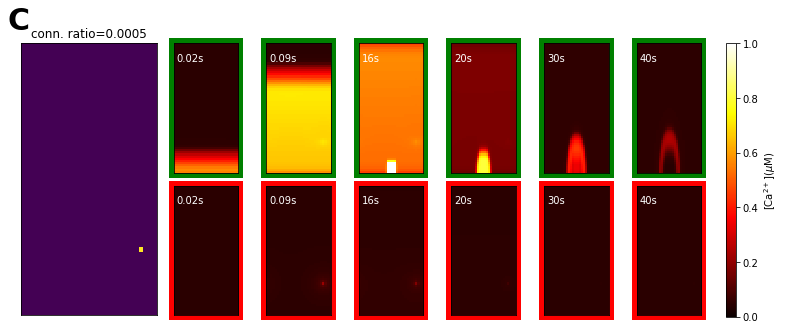

In [95]:
plot_conn_ratios("2020-08-13-13-23-12-595649", 'A', "./results/figures/connectivity-ratio-a.png", 0.2)
plot_conn_ratios("2020-08-13-13-12-05-384223", 'B', "./results/figures/connectivity-ratio-b.png", 0.02)
plot_conn_ratios("2020-08-13-14-09-26-806577", 'C', "./results/figures/connectivity-ratio-c.png", 0.0005)